# Class 3: Model-fitting

In this class we will describe the use of the $\chi^2$ statistic as a hypothesis test of a model, and in determining best-fitting parameters.  After these activities you should be able to:

- apply the $\chi^2$ statistic as a hypothesis test
- understand the probability distribution of the $\chi^2$ statistic and its interpretation as a $p$-value
- apply the $\chi^2$ statistic in parameter fitting
- determine parameter errors and joint confidence regions using intervals of $\Delta \chi^2$

## Comparing data and models

A key task in statistics is to build models which describe our data.  When comparing data and models, we are typically doing one of two things:

- **Hypothesis testing:** we have a set of $N$ measurements $x_i \pm \sigma_i$, which a theorist says should have values $\mu_i$.  _How probable is it that these measurements would have been obtained, if the theory is correct?_

- **Parameter estimation:** we have a parameterized model which describes the data, such as $y = ax + b$.  _What are the best-fitting parameters and errors in those parameters?_

The most important statistic to help with these tasks is the **$\chi^2$ statistic** between the data and the model, which is defined (assuming the data points are statistically independent) by:

$\chi^2 = \sum_{i=1}^N \left( \frac{x_i - \mu_i}{\sigma_i} \right)^2$

$\chi^2$ is a measure of the **goodness-of-fit** of the data to the model, which the above equation evaluates according to **how many standard deviations** each data point lies from the model.  If the data are numbers taken as part of a counting experiment, we could use the Poisson error $\sigma_i^2 = \mu_i$.

## Hypothesis testing using $\chi^2$

If we run an experiment many times, sampling $N$ data points $x_i$ from a model using Gaussian statistics and evaluating the $\chi^2$ statistic, what is the resulting probability distribution of $\chi^2$?  The answer is the **$\chi^2$ probability distribution**,

$P(\chi^2) \propto \left( \chi^2 \right)^{\frac{\nu}{2}-1} e^{-\chi^2/2}$

where $\nu$ is the number of **degrees of freedom**.  If the model as no free parameters, then $\nu = N$.  If we are fitting a model with $p$ free parameters (see below), then $\nu = N - p$.  We note that the mean of the $\chi^2$ distribution, i.e. the average over these experiments, is $\langle \chi^2 \rangle = \nu$.  This makes intuitive sense because each data point should lie about 1-$\sigma$ from the model, hence contribute $1.0$ to the $\chi^2$ statistic.  The variance of the $\chi^2$ statistic is ${\rm Var}(\chi^2) = 2\nu$, hence if data is drawn from the model we expect $\chi^2 \sim \nu \pm \sqrt{2\nu}$.

The $\chi^2$ distribution looks like this for $\nu = 10$:

(0.0, 0.15)

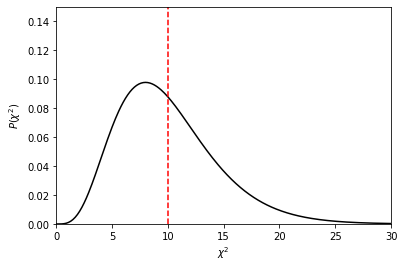

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Plot the chi-squared probability distribution for a given number of degrees of freedom
nu = 10 # number of degrees of freedom
xmin,xmax,nx = 0.,30.,301 # range of values for chi-squared
x = np.linspace(xmin,xmax,nx) # variable for chi-squared
y = stats.chi2.pdf(x,nu) # evaluate probability for each value of chi-squared
# Make the plot
ymin,ymax = 0.,0.15
plt.plot(x,y,color='black')
plt.plot([nu,nu],[ymin,ymax],color='red',linestyle='dashed')
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'$P(\chi^2)$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

To use $\chi^2$ as a hypothesis test, we compute $\chi^2$ for a given dataset and model.  We then ask the question: **if the model is correct, what is the probability that this value of $\chi^2$, or a larger one, could arise by chance?**  This probability is called the $p$-value and may be calculated from $P(\chi^2)$ by integrating the area under the curve at values greater than some value of $\chi^2$.

For example, suppose that $\nu = 30$ and consider datasets with two different values, $\chi^2 = 37.5$ and $\chi^2 = 52.1$. We would integrate the following areas:

(0.0, 0.06)

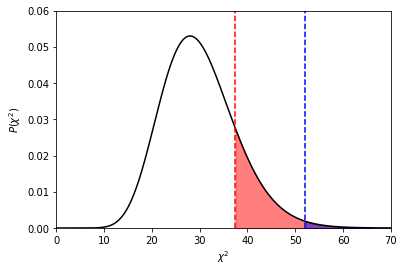

In [2]:
# Plot chi-squared probability distribution
# Indicate areas under the curve at values of chi-squared greater than a couple of test values
nu = 30 # number of degrees of freedom
chisq1 = 37.5 # 1st value of chi-squared to test
chisq2 = 52.1 # 2nd value of chi-squared to test
# Range of values for chi-squared
xmin,xmax,nx = 0.,70.,701
x = np.linspace(xmin,xmax,nx)
dx = (xmax-xmin)/nx
ymin,ymax = 0.,0.06
# Determine chi-squared probability distribution
y = stats.chi2.pdf(x,nu)
plt.plot(x,y,color='black')
# Find 1st chi-squared test value in array, and shade area under the curve at greater values
plt.plot([chisq1,chisq1],[ymin,ymax],color='red',linestyle='dashed')
i = int((chisq1-xmin)/dx)
plt.fill_between(x[i:],np.zeros_like(x[i:]),y[i:],color='red',alpha=0.5)
# Find 2nd chi-squared test value in array, and shade area under the curve at greater values
plt.plot([chisq2,chisq2],[ymin,ymax],color='blue',linestyle='dashed')
i = int((chisq2-xmin)/dx)
plt.fill_between(x[i:],np.zeros_like(x[i:]),y[i:],color='blue',alpha=0.5)
# Complete plot
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'$P(\chi^2)$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

The resulting $p$-values in these cases are:

In [3]:
nu = 30 # number of degrees of freedom
chisq1 = 37.5 # 1st value of chi-squared to test
chisq2 = 52.1 # 2nd value of chi-squared to test
p1 = stats.chi2.sf(chisq1,nu) # probability of chi-squared exceeding the 1st test value
p2 = stats.chi2.sf(chisq2,nu) # probability of chi-squared exceeding the 2nd test value
print('p-value for chi2 =',chisq1,'and nu =',nu,'is p =',p1)
print('p-value for chi2 =',chisq2,'and nu =',nu,'is p =',p2)

p-value for chi2 = 37.5 and nu = 30 is p = 0.16301345461145947
p-value for chi2 = 52.1 and nu = 30 is p = 0.007429708671565914


The null hypothesis (that the dataset is sampled from the model) has not been rejected for the first value of $\chi^2$, but has been rejected for the second value of $\chi^2$.  In other words, we say that the first dataset is consistent with being sampled from the model, but the second dataset is not.

### Caveats when interpreting $\chi^2$ values

- We are assuming that the errors in the data are **Gaussian** and **reliable**
- If the errors have been **under-estimated**, then an **improbably high** value of $\chi^2$ can be obtained
- If the errors have been **over-estimated**, then an **improbably low** value of $\chi^2$ can be obtained
- Since errors can often be non-Gaussian or approximate, a model is typically only rejected for very low values of $p$ such as $0.001$ or below
- A possible issue in using the $\chi^2$ statistic is **binning of data**.  If the numbers of points in each bin are too small, then the probabilities can become non-Gaussian.  As a rule-of-thumb, 80% of bins must have $N > 5$.

### Reduced $\chi^2$

As a way of summarising the model fit, we can quote the **reduced $\chi^2$ statistic**, $\chi_r^2 = \chi^2/\nu$.

For a good fit, $\chi_r^2 \sim 1$ (because $\overline{\chi^2} = \nu$).  But note that the probability of the data being consistent with the model also depends on $\nu$.  **Do not just quote the reduced $\chi^2$ value**.

### Modification for correlated data

As previously mentioned, the above equation for $\chi^2$ is only valid when the data points are uncorrelated.  If you are dealing with correlated data, the equation must be modified:

$\chi^2 = \sum_i \sum_j (d_i - m_i) \left( C^{-1} \right)_{ij} (d_j - m_j) = (d - m)^T C^{-1} (d - m)$

where the last version is written in vector/matrix notation.  Here, $C$ is the covariance matrix of the data:

$C_{ij} = \langle x_i x_j \rangle - \langle x_i \rangle \langle x_j \rangle$

Note that the number of degrees of freedom is unchanged for correlated data.

## Parameter estimation using $\chi^2$

A model typically contains free parameters.  How do we determine the most likely values of these parameters and their error ranges?

- Suppose we are fitting a model with 2 free parameters $(a,b)$
- The most likely ("best-fitting") values of $(a,b)$ are found by minimizing the $\chi^2$ statistic
- The joint error distribution of $(a,b)$ can be found by calculating the values of $\chi^2$ over a grid of $(a,b)$ and enclosing a particular region $\chi^2 < \chi_{\rm min}^2 + \Delta \chi^2$ (see below).

This process is described in the following worked example.  Consider the following example dataset containing $N=10$ points:

Text(0, 0.5, '$y$')

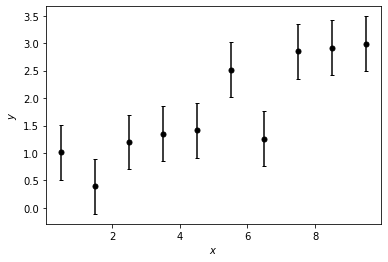

In [4]:
# Read in and plot the example dataset sampled from a straight line
# You will need to change the file path to the location where you've saved the data
data = np.loadtxt('../datasets/straightline.dat')
x,y,yerr = data[:,0],data[:,1],data[:,2]
n = len(x)
plt.plot(x,y,marker='o',markersize=5,color='black',linestyle='None')
plt.errorbar(x,y,yerr=yerr,color='black',capsize=2.,linestyle='None')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Could these points be fit by a constant $y = b$, and if so what is the best-fitting value of $b$?  We can answer that question by minimizing the $\chi^2$ statistic:

In [5]:
# Function which evaluates the chi-squared value of a model y=b for the (x,y) dataset
def chisqstraightline1(p,x,y,yerr):
  b = p[0]
  return np.sum(((y - b)/yerr)**2)

# Find the best-fitting model y=b to the (x,y) dataset by minimising chi-squared
from scipy.optimize import minimize
p0 = [1.] # initial guess of the value of b (result should not depend on this)
result = minimize(chisqstraightline1,p0,args=(x,y,yerr)) # perform the minimisation
b1 = result['x'][0] # best-fitting value of b
minchisq1 = result['fun'] # chi-squared value corresponding to the best fit
dof1 = n-1 # number of degrees of freedom (data points minus fitted parameters)
print('Best-fitting value of b =',b1)
print('Minimum chi-squared =',minchisq1)
print('Number of degrees of freedom =',dof1)

Best-fitting value of b = 1.7899999897904915
Minimum chi-squared = 31.635200000000005
Number of degrees of freedom = 9


Is this value of $\chi^2$ likely, given the model?  We can answer that by computing the $p$-value which corresponds to the probability of obtaining this value of $\chi^2$ **or higher**, when a dataset is sampled from a model.

In [6]:
# Probability of chi-squared to exceed the value we've found, if the data is sampled from the model
# Low values of this probability indicate that the data is unlikely to be drawn from the model
p1 = stats.chi2.sf(minchisq1,dof1)
print('p-value =',p1)

p-value = 0.00023020030084131723


This situation is hence very unlikely, suggesting that the model is not a good fit to the data.

Instead, could these points be fit by a straight line $y = ax + b$?  Minimize $\chi^2$ as before:

In [7]:
# Function which evaluates the chi-squared value of a model y=a*x+b for the (x,y) dataset
def chisqstraightline2(p,x,y,yerr):
  a,b = p[0],p[1]
  return np.sum(((y - (a*x + b))/yerr)**2)

# Find the best fitting model y=a*x+b to the (x,y) dataset by minimising chi-squared
p0 = [0.2,1.] # initial guess of the values of a,b (result should not depend on this)
result = minimize(chisqstraightline2,p0,args=(x,y,yerr)) # perform the minimisation
a2,b2 = result['x'] # best-fitting values of a,b
minchisq2 = result['fun'] # chi-squared value corresponding to the best fit
dof2 = n-2 # number of degrees of freedom (data points minus fitted parameters)
p2 = stats.chi2.sf(minchisq2,dof2) # probability of chi-squared to exceed the value we've found
print('Best-fitting value of a =',a2)
print('Best-fitting value of b =',b2)
print('Minimum chi-squared =',minchisq2)
print('Number of degrees of freedom =',dof2)
print('p-value =',p2)

Best-fitting value of a = 0.27042421678017053
Best-fitting value of b = 0.4378789090155025
Minimum chi-squared = 7.502540606060829
Number of degrees of freedom = 8
p-value = 0.48350484463274246


This probability is much higher, meaning that the hypothesis that the data is sampled from this model cannot be rejected.  We say that the model is a "good fit".

### Errors in the best-fitting parameters

We can determine the errors in the parameters by determining the value of $\chi^2$ across a grid of $(a,b)$, and constructing a region of constant $\chi^2 = \chi^2_{\rm min} + \Delta \chi^2$.  When constructing a joint confidence region between 2 parameters, the relevant intervals are $\Delta \chi^2 = (2.30, 6.17, 11.80)$ for (1,2,3)-$\sigma$ confidence. 

Let's see how this is done in the above case:

Minimum chi-squared = 7.504212500000001
Best-fitting value of a = 0.2725
Best-fitting value of b = 0.42500000000000016


Text(0, 0.5, '$b$')

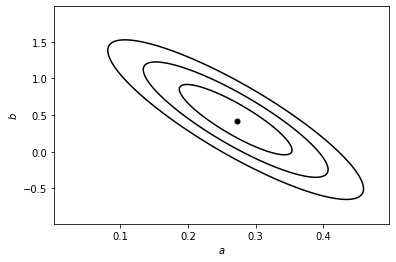

In [8]:
# Use the chi-squared method to create joint confidence intervals of model parameters a,b fit to a dataset
# Create grid of values of the model parameters a,b
amin,amax,na = 0.,0.5,100
bmin,bmax,nb = -1.,2.,100
da,db = (amax-amin)/na,(bmax-bmin)/nb
alst = np.linspace(amin+0.5*da,amax-0.5*da,na)
blst = np.linspace(bmin+0.5*db,bmax-0.5*db,nb)
# Evaluate the chi-squared value at each grid point (i.e. for each set of model parameters)
# (Note that we are not performing a *minimisation* for each set of model parameters, just an evaluation)
chisq2 = np.empty((na,nb))
for i in range(na):
  for j in range(nb):
    chisq2[i,j] = chisqstraightline2([alst[i],blst[j]],x,y,yerr)
# Find the minimum value of chi-squared across the grid
minchisq2 = np.amin(chisq2)
print('Minimum chi-squared =',minchisq2)
# Find the values of the model parameters at the point of minimum chi-squared
i,j = np.unravel_index(chisq2.argmin(),chisq2.shape)
a2,b2 = alst[i],blst[j]
print('Best-fitting value of a =',a2)
print('Best-fitting value of b =',b2)
# These values of delta chi-squared correspond to the 1-sigma, 2-sigma and 3-sigma confidence regions
clst = np.array([0.,2.30,6.17,11.8])
# Add the minimum chi-squared to these intervals to obtain the chi-squared contours for the plot
clst += minchisq2
# Make a contour plot of these chi-squared values
alst2,blst2 = np.meshgrid(alst,blst,indexing='ij')
plt.contour(alst2,blst2,chisq2,levels=clst,colors='k')
# Indicate the best-fitting model parameters
plt.plot([a2],[b2],marker='o',markersize=5,color='black',linestyle='None')
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')

We can translate this to errors in **individual parameters** by determining for each parameter $a$, the minimum value of $\chi^2$ varying parameter $b$:

68% confidence region = 0.18673057259713693 -> 0.2925882056451612
Error in a = 0.05292881652401213


Text(0, 0.5, '$\\chi^2_{\\rm min} \\; ({\\rm varying} \\; b)$')

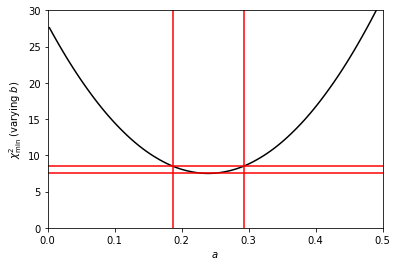

In [9]:
# Convert the joint chi-squared distribution for 2 parameters into individual errors in 1 parameter
# Minimise the value of chi-squared for each different value of parameter a, varying parameter b
chisq1 = np.amin(chisq2,axis=0)
# Find the value of parameter a corresponding to the minimum value of chi-squared
i = chisq1.argmin()
# The chi-squared interval corresponding to the 68% confidence region varying 1 parameter is, delta chi-squared = 1
# Find the values of a corresponding to chi-squared = minimum chi-squared + 1, by interpolation
abot = np.interp(minchisq2+1.,np.flip(chisq1[:i+1]),np.flip(alst[:i+1]))
atop = np.interp(minchisq2+1.,chisq1[i:],alst[i:])
print('68% confidence region =',abot,'->',atop)
print('Error in a =',0.5*(atop-abot))
# Plot the minimum chi-squared as a function of parameter a, marginalising over parameter b
# Indicate the 68% confidence range of parameter a, corresponding to chi-squared = minimum chi-squared + 1
ymin,ymax = 0.,30.
plt.plot(alst,chisq1,color='black')
plt.plot([amin,amax],[minchisq2,minchisq2],color='red')
plt.plot([amin,amax],[minchisq2+1.,minchisq2+1.],color='red')
plt.plot([abot,abot],[ymin,ymax],color='red')
plt.plot([atop,atop],[ymin,ymax],color='red')
plt.xlim(amin,amax)
plt.ylim(ymin,ymax)
plt.xlabel(r'$a$')
plt.ylabel(r'$\chi^2_{\rm min} \; ({\rm varying} \; b)$')

## Activity

In this Activity we will use a recent supernova distance-redshift dataset to determine the cosmological parameters $(\Omega_m,\Omega_\Lambda)$.  First let's read in the data and use astropy to compute a fiducial model:

Text(0, 0.5, '$DM$')

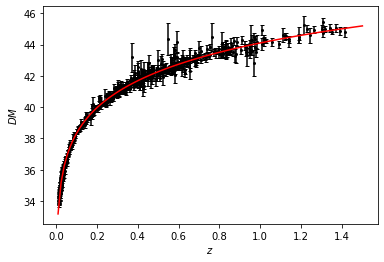

In [10]:
from astropy.cosmology import LambdaCDM

# Function which determines the supernova luminosity distance for given cosmological parameters (Omega_m, Omega_L)
def getdmmod(p,z):
  om,ol = p[0],p[1]
  cosmo = LambdaCDM(H0=70.,Om0=om,Ode0=ol)
  r = cosmo.comoving_distance(z).value
  dl = r*(1.+z)
  return 5.*np.log10(dl) + 25.

# Read in and plot the supernova dataset
# You will need to change the file path to the location where you've saved the data
datfile = '../datasets/SN_dataset.dat'
data = np.loadtxt(datfile)
z,dm,dmerr = data[:,0],data[:,1],data[:,2]
plt.plot(z,dm,marker='o',markersize=2,color='black',linestyle='None')
plt.errorbar(z,dm,yerr=dmerr,color='black',capsize=2.,linestyle='None')
# Overplot a standard cosmological model as an example
xmin,xmax = 0.,1.5
zmod = np.linspace(0.01,xmax,100)
p = [0.3,0.7] # values of (Omega_m, Omega_L)
dmmod = getdmmod(p,zmod)
plt.plot(zmod,dmmod,color='red')
plt.xlabel(r'$z$')
plt.ylabel(r'$DM$')

Now:

- Minimize $\chi^2$ and find the best-fitting $(\Omega_m, \Omega_\Lambda)$
- Construct 2D confidence regions in $(\Omega_m, \Omega_\Lambda)$
- Determine the individual errors in $\Omega_m$ and $\Omega_\Lambda$